In [2]:
import numpy as np

# 1. Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [3]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [4]:
h_vec = np.linspace(0.1,1.5,100) 

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

We start by defining the given functions:

In [5]:
import matplotlib.pyplot as plt

In [6]:
def consumption(w,h,l):
    #We define an outcome for each scenario
    if l == 1:
        return w*h*l
    else:
        return b

In [7]:
def utility(w,h,l):
    return (consumption(w,h,l)**(1-rho))/(1-rho) - gamma*l

We create the 2 possible values for human capital in period 2.

In [8]:
h2_vec0 = h_vec + Delta*0.5
h2_vec1 = h_vec + 1 + Delta*0.5

First of all we notice that she can reach the highest utility in period 2 if she choose to work in period 1. This can be seen in the graph below.

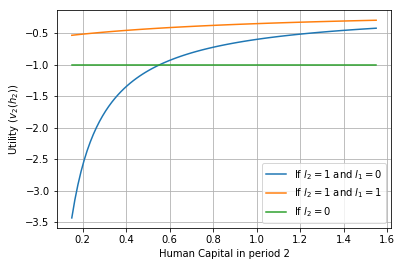

In [9]:
#Making a list which only contains the utility if she does not work in period 2. We only do this to be able to plot it.
empty = np.empty(100)
utility_l0 = []
for i in empty:
    utility_l0.append(utility(w,h2_vec0,0))
    
plt.plot(h2_vec0, utility(w,h2_vec0,1), label = 'If $l_2=1$ and $l_1=0$')
plt.plot(h2_vec0, utility(w,h2_vec1,1), label = 'If $l_2=1$ and $l_1=1$')
plt.plot(h2_vec0, utility_l0          , label = 'If $l_2=0$')
plt.ylabel('Utility ($v_2(h_2)$)'), plt.xlabel('Human Capital in period 2')
plt.legend()
plt.grid()
plt.show()

The most important thing to notice here is, that she can actually get higher utility by not working in period 2, than if she doesn't work in period 1. This depends on how high her human capital is.

We now solve for the optimal $l_2$:

In [10]:
def solve_v2(w):
    loop = np.linspace(0,99,100,dtype=int)
    #We make 2 lists which will contain the values 0 or 1 depending on if she gains more utility of working or not
    #First a lists where she does not work in period 1:
    l2_vec0 = []
    #Then a list where she does work in period 1:
    l2_vec1 = []
    
    #Making the for loop to generate values 0 or 1 into our lists
    for i in loop:
        
        #If she does not work in period 1:
        if utility(w,h2_vec0[0],0) < utility(w,h2_vec0[i],1):
            l2_vec0.append(1)
        else:
            l2_vec0.append(0)
            
        #If she works in period 1:
        if utility(w,h2_vec1[0],0) < utility(w,h2_vec1[i],1):
            l2_vec1.append(1)
        else:
            l2_vec1.append(0)
            
    return l2_vec0, l2_vec1

l2_vec0, l2_vec1 = solve_v2(w)

We plot the solutions to inspect them:

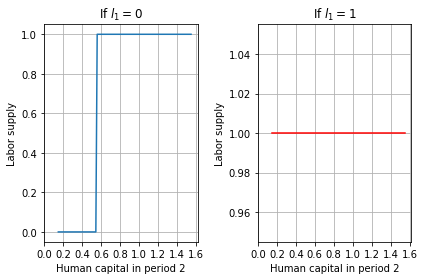

In [11]:
plt.subplot(121)
plt.title('If $l_1 = 0$')
plt.plot(h2_vec0, l2_vec0)
plt.grid()
plt.ylabel('Labor supply')
plt.xlabel('Human capital in period 2')
plt.xticks([0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6])
plt.subplot(122)
plt.title('If $l_1 = 1$')
plt.plot(h2_vec0, l2_vec1, color='red')
plt.grid()
plt.ylabel('Labor supply')
plt.xlabel('Human capital in period 2')
plt.xticks([0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6])
plt.tight_layout()

We see that if $l_1=0$ she will get more utility by not working up to a certain point between 0.4 and 0.6 human capital. We will now find exactly this point by optimizing.  
So naturally we want to import optimize from scipy.

In [12]:
from scipy import optimize

We create a lambda function where we subtract 1 from the the utility she gets from working in period 1, as this is her utility from not working in period 1. So basicly if you look at the first plot which shows the utility, we subtract the green line from the blue line. This way we can find the exact point where the lines cross each other.

In [13]:
#We set a '-' in front of the function as we want to use the optimize.minimize function.
obj = lambda h: -utility(w,h,1)-1

We use the optimize.minimize function to find the wanted value. We use the bounded method as the human capital is bounded.

In [14]:
optimize.minimize_scalar(obj, method='bounded', bounds=[0.1,1.5])

     fun: -0.5666657193115782
 message: 'Solution found.'
    nfev: 26
  status: 0
 success: True
       x: 1.4999957369142178

We find that the solution to the problem is h = 0.5667 which means that if she does not work in period 1, she will get more utility by not working in period 2 as long as her human capital is lesser than 0.5667. Though, when she has more than 0.5667 human capital, she will get more utility by working in period 2.  
It is also important to notice that if she decides to work in period 1, she will always reach a higher level of utility by working in period 2. This is because of the gain she get i human capital by working in period 1. No matter what it will get higher than 0.5667, and therefore it is best for her to work.  
The solution to the worker's problem is then:  
$$
l_2^* = \begin{cases}
1 \quad \text{if} \quad l_1 = 1  \\
1 \quad \text{if} \quad l_1 = 0 \quad \wedge \quad 0.5667 \le h  \\
0 \quad \text{if} \quad l_1 = 0 \quad \wedge \quad h \le 0.5667
\end{cases}
$$

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

First we want to find out how many of the values in h_vec that are smaller or equal to 0.5667:

In [15]:
s = np.logical_not(h_vec>=0.5666657193115782)
import collections
collections.Counter(s)

Counter({True: 33, False: 67})

We find that there are 33 values in her human capital vector that is lesser than 0.5667. With this information we can define the utility function for period 1.

In [16]:
def utility_v1(w,h,l):
    utilities = []
    #If she chooses not to work:
    if l == 0:
        
        i = 0
        #She doesn't want to work in period 2 if her human capital is lower than 0.5667
        while i < 33:
            utilities.append(utility(w,h[i],l) + beta*utility(w,h2_vec0[i],0))
            i +=1
        
        #She will work in period 2 if her human capital is higher than 0.5667
        while 32 < i < 100:
            utilities.append(utility(w,h[i],l) + beta*utility(w,h2_vec0[i],1))
            i +=1
  
    #If she chooses to work:
    else:
        i = 0
        while i < 100:
            utilities.append(utility(w,h[i],l)+ beta*utility(w,h2_vec1[i],1))
            i +=1
    return utilities

Below we see her utility as a function of her human capital. We notice that if she has low human capital, it can pay off not to work in period 1, but as her human capital is rising, it becomes better and better for her to work in period 1.

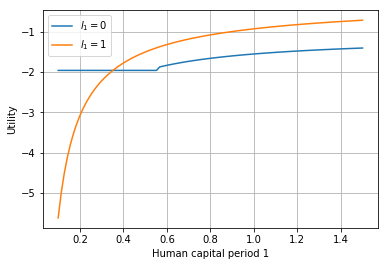

In [17]:
plt.plot(h_vec, utility_v1(w,h_vec,0), label='$l_1=0$')
plt.plot(h_vec, utility_v1(w,h_vec,1), label='$l_1=1$')
plt.legend()
plt.xlabel('Human capital period 1'), plt.ylabel('Utility')
plt.grid()
plt.show()

We now make a function which will plot the labor as a function of human capital:

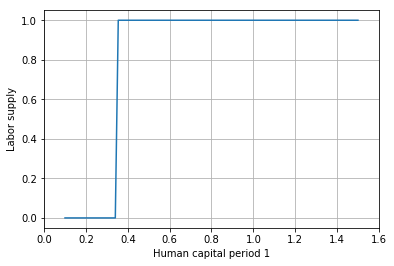

In [18]:
def solve_v1(w):
    loop = np.linspace(0,99,100, dtype=int)
    l1_vec = []
    
    for i in loop:
        if utility_v1(w,h_vec,0)[i] < utility_v1(w,h_vec,1)[i]:
            l1_vec.append(1)
        else:
            l1_vec.append(0)
    plt.plot(h_vec, l1_vec)
    plt.xticks([0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6])
    plt.ylabel('Labor supply'), plt.xlabel('Human capital period 1')
    plt.grid()
    return plt.show()
solve_v1(w)

We see as expected that the labor jumps up at the point where the 2 utility curves cut each other. We will now find which value of h that triggers this movement.

First we create a list that contains the values of the utility of working minus the utility of not working.

In [19]:
def difference(w):
    diff = []
    i = 0
    while i < 100:
        diff.append(utility_v1(w,h_vec,1)[i]-utility_v1(w,h_vec,0)[i])
        i +=1
    return diff

Now we find out how many of the values in the list that are lesser than 0:

In [20]:
#We make a list of zeroes to compare with
zeroes = np.zeros(100)
#Make the comparison
count = np.logical_not(difference(w) > zeroes)
#Count the numbers that a lesser than 0
collections.Counter(count)

Counter({True: 18, False: 82})

We see that there are 18 values which are lesser than 0, and 82 values which are greater than 0.  
From this we can get the value of human capital where the labor supply makes the jump:

In [21]:
h_vec[17]

0.3404040404040404

Thus the worker maximizes her utility with the following:  
$$
l_1^* = \begin{cases}
0 \quad \text{if} \quad h_1 \le 0.34  \\
1 \quad \text{if} \quad 0.34 < h_1
\end{cases}
$$

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

As an example we set the wage to be 0.9 - right under the unemployment benefit.  
We plot it in a graph below, where we see that the worker actually can achieve a higher utility by working. We notice that there are 2 ways of getting a higher utility - if she has high human capital she can simply just choose to work in period 2, if she does not have high human capital she needs to work in both periods to achieve a higher utility.

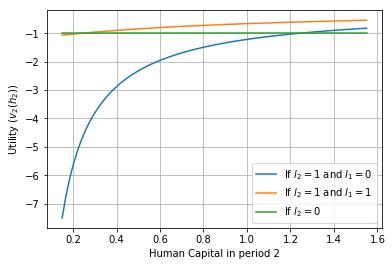

In [22]:
plt.plot(h2_vec0, utility(0.9,h2_vec0,1), label = 'If $l_2=1$ and $l_1=0$')
plt.plot(h2_vec0, utility(0.9,h2_vec1,1), label = 'If $l_2=1$ and $l_1=1$')
plt.plot(h2_vec0, utility_l0            , label = 'If $l_2=0$')
plt.ylabel('Utility ($v_2(h_2)$)'), plt.xlabel('Human Capital in period 2')
plt.legend()
plt.grid()
plt.show()

We can also see on the equation for $v_2$ that as soon as the human capital is high enough to fullfill $b = wh_tl_t-\gamma l_t \Leftrightarrow h_t = \frac{b+\gamma l_t}{wl_t}$. As $b>w$ now, this means that $h_t$ needs to be greater than 1.  
This makes sense as $wh_tl_t$ only can be greater than $b$ if $h_t$ is greater than 1, and when she decides to work you also have to account for the disutility of working.  
Her level of human capital decides how much impact the wage have. Therefore it can be concluded that if the human capital is high enough, the worker will always choose to work, even though the wage is lower than the unemployment benefit.

# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [17]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

First, we of course import sympy:

In [23]:
import sympy as sm

Then we define all the parameters and variables as symbols:

In [26]:
sm.init_printing(use_unicode=True)

In [28]:
y = sm.symbols("y_t")

In [29]:
y

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [18]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [19]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [20]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?